# <span style="color: #3ea4ed;">**💉 Diabetes Prediction**</span>


-------------------------------------------------------------------------------------------------------------------

<span style="color:">___Project Domain : Health Care___</span>

-------------------------------------------------------------------------------------------------------------------

#### ___Project Goal :___

- _The goal is to develop a machine learning model capable of accurately predicting the likelihood of diabetes in individuals based on their demographic, lifestyle, and health-related factors, with the ultimate aim of assisting healthcare professionals in early diagnosis and intervention strategies for at-risk populations._

- _This is a binary classification project in which the model is built to predict whether the individual has diabetes or not._

- _First, exploratory data analysis (EDA) is conducted to understand the dataset, followed by the implementation of various preprocessing techniques. Subsequently, a classification model is constructed and assessed to achieve high accuracy in predicting obesity levels._


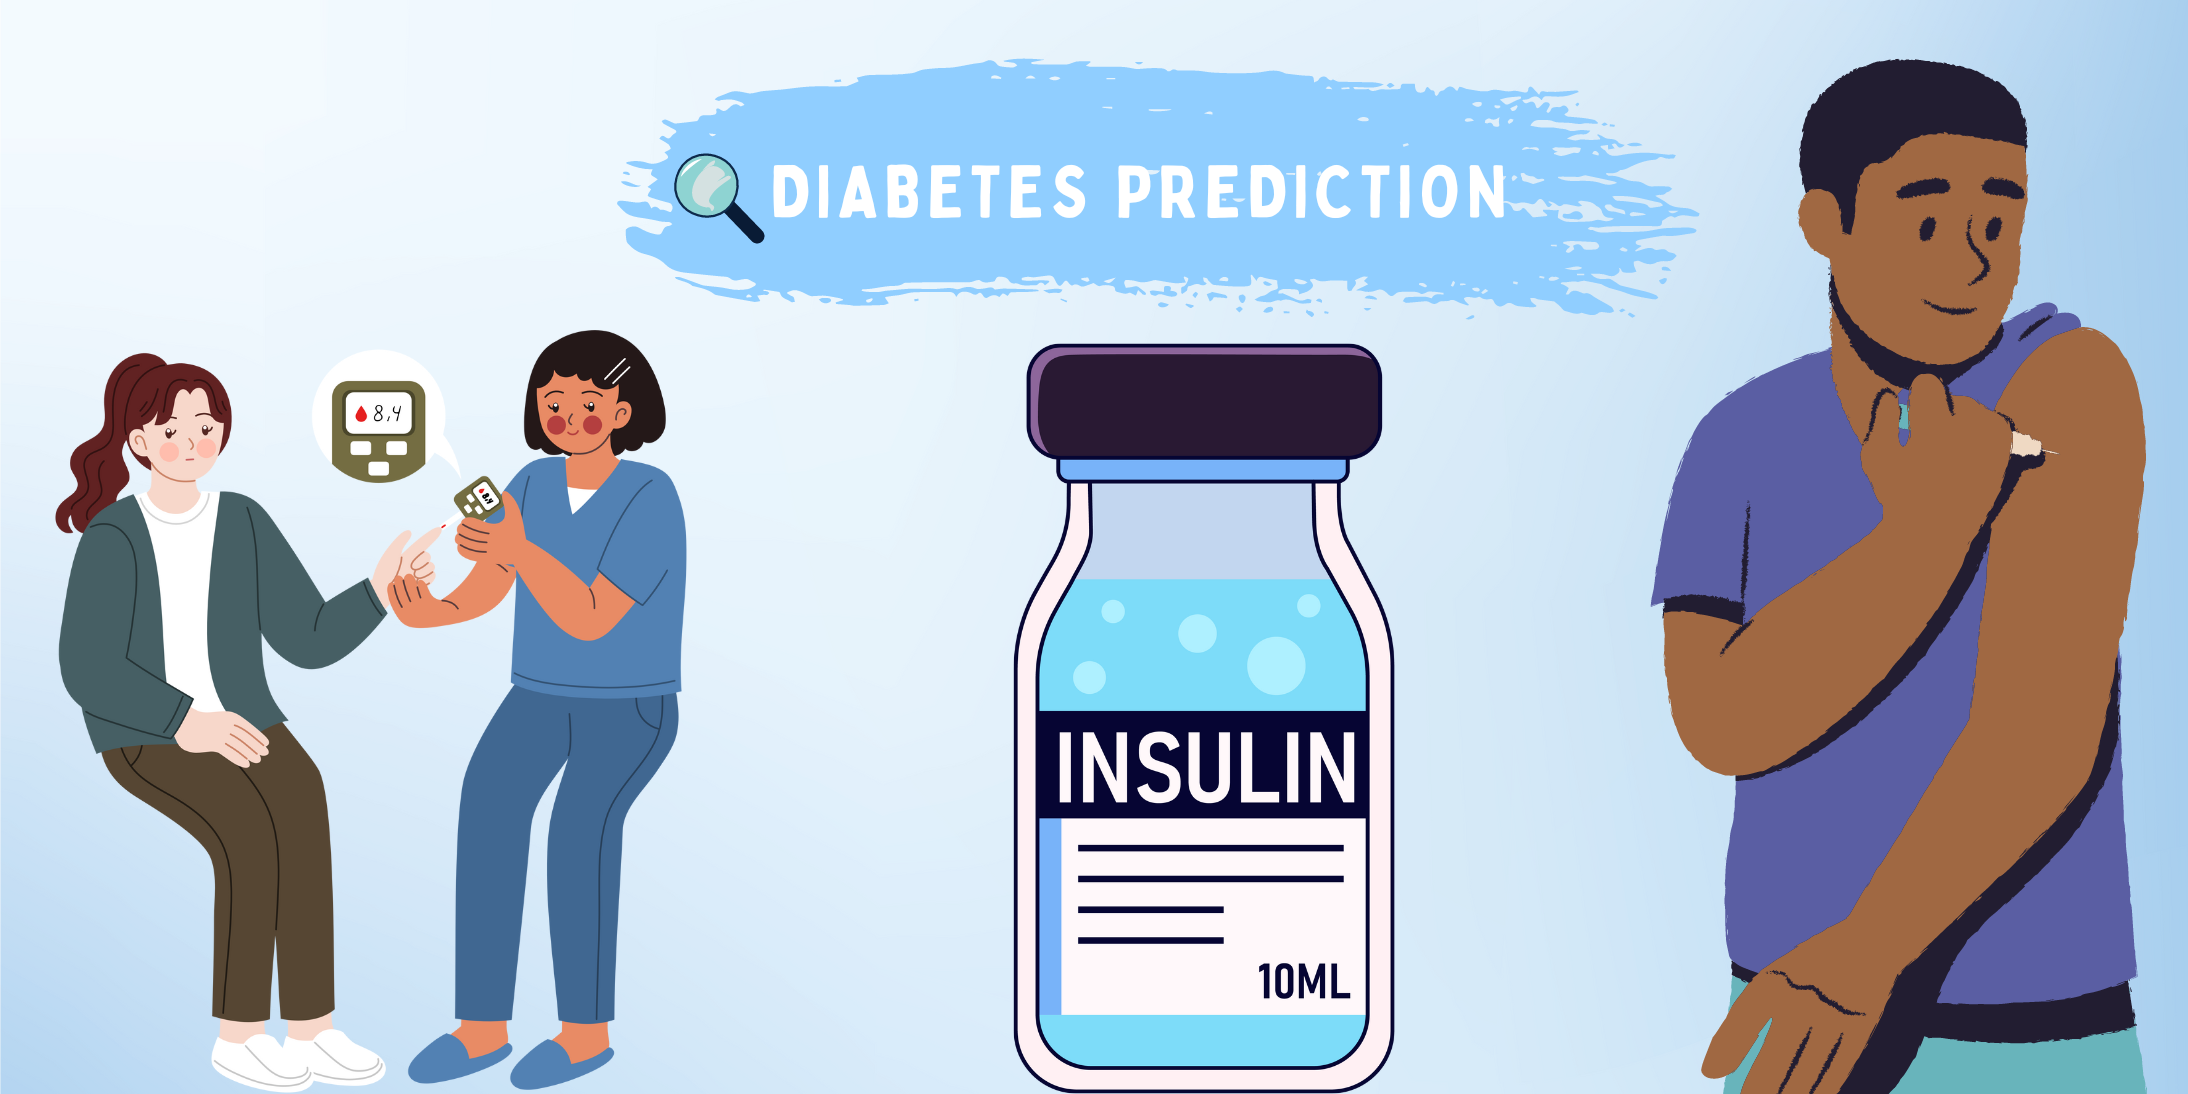

### ***Load Dataset :***

In [1]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Loading the data into pandas dataframe
df=pd.read_csv("diabetes - diabetes.csv")
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
#Shape of the data:
print("Shape of  Train data :",df.shape)
#Checking for duplicates:
print("Duplicated rows :",df.duplicated().sum())

Shape of  Train data : (768, 9)
Duplicated rows : 0


___Observation :___
- 768 rows and 9 columns are in the dataset.
- No duplicated entries are present.

-------------------------------------------------------------------------------------------------------------------
### ***Exploratory Data Analysis (EDA)***
-------------------------------------------------------------------------------------------------------------------

In [4]:
#Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

***Feature Variables :***
- 'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age' 

-------------------------------------------------------------------------------------------------------------------

***Target Variable :***
- 'Outcome'

-------------------------------------------------------------------------------------------------------------------

___***Understanding the Variables :***___

- **Pregnancies**: Number of pregnancies.
- **Glucose**: Blood sugar level.
- **BloodPressure**: Body blood Ppressure.
- **SkinThickness**: Thickness of skinfolds.
- **Insulin**: Insulin level in blood.
- **BMI (Body Mass Index)**: Measure of body fat.
- **DiabetesPedigreeFunction**: Score based on family history.
- **Age**: Age of the patient.
- **Outcome**: Whether the patient has diabetes or not (1 for diabetes, 0 for no diabetes).

-------------------------------------------------------------------------------------------------------------------

#### ___Descriptive Statistics :___


In [5]:
#Basic information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


___Observation :___
- All the feature variables are numerical variables, and there are no categorical variables present in feature variables.
- The target variable is a categorical variable that consists of binary categories.


In [6]:
# Data Summary
print("Data summary :")
df.describe()

Data summary :


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


___Checking for Missing Values (NaN):___

In [7]:
pd.DataFrame(df.isna().sum()).transpose()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,0,0,0,0,0,0,0,0


#### ___Data Visualization :___

___Univariate Analysis :___

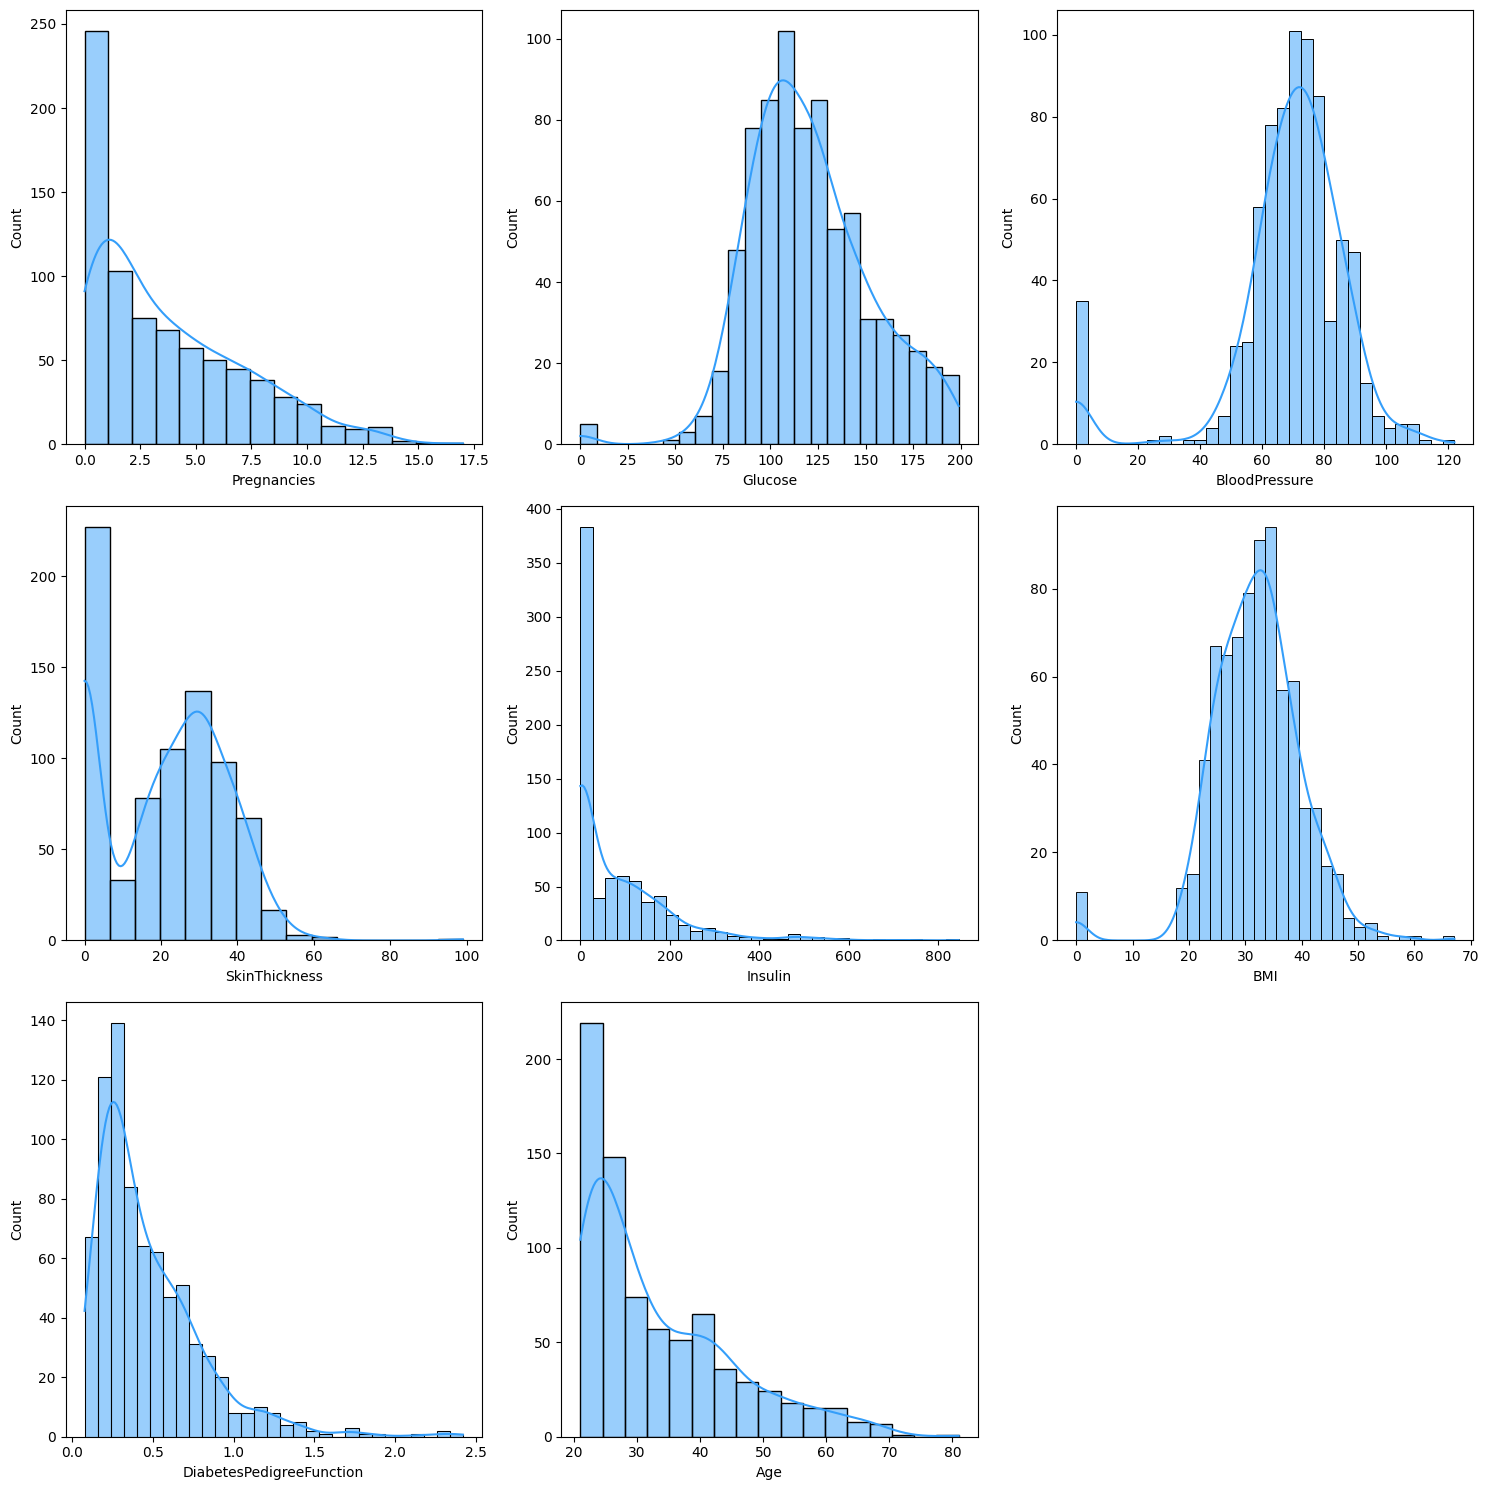

In [8]:
#Histplot to visualize data distribution

plt.figure(figsize=(15, 15))
ind=1
for variable in df.columns.tolist()[:-1]:
    plt.subplot(3,3,ind)
    sns.histplot(x=df[variable],color="#349efa",kde=True)
    plt.xlabel(variable)
    ind+=1
plt.tight_layout()
plt.show()

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

___Observation :___

- **Pregnancies, DiabetesPedigreeFunction and Age** distributions are skewed to right.
- **BMI, BloodPressure, Glucose and Skin Thickness** are like normally distributed with some outliers.



+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

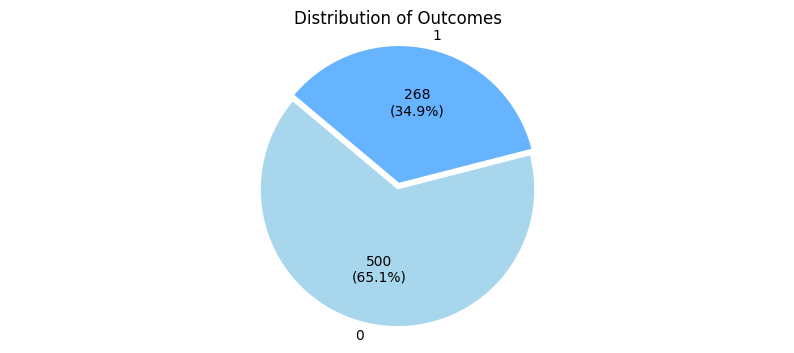

In [9]:
#Pie chart to visualize target class distribution in the dataset
outcome_counts = df["Outcome"].value_counts()
labels=outcome_counts.index.tolist()
counts=outcome_counts.values.tolist()
colors = ['#a8d7ed','#66b3ff']
plt.figure(figsize=(10, 4))
plt.pie(counts, labels=labels, autopct=lambda p: '{:.0f}\n({:.1f}%)'.format(p * sum(counts) / 100, p), startangle=140, explode=(0.05,0),colors=colors)
plt.axis('equal')  
plt.title('Distribution of Outcomes')
plt.show()

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

___Observation :___

- Pie chart reveals an **unequal distribution**, with a significant majority of patients demonstrating no indication of diabetes.

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

___Checking for Outliers in Numerical Variables:___

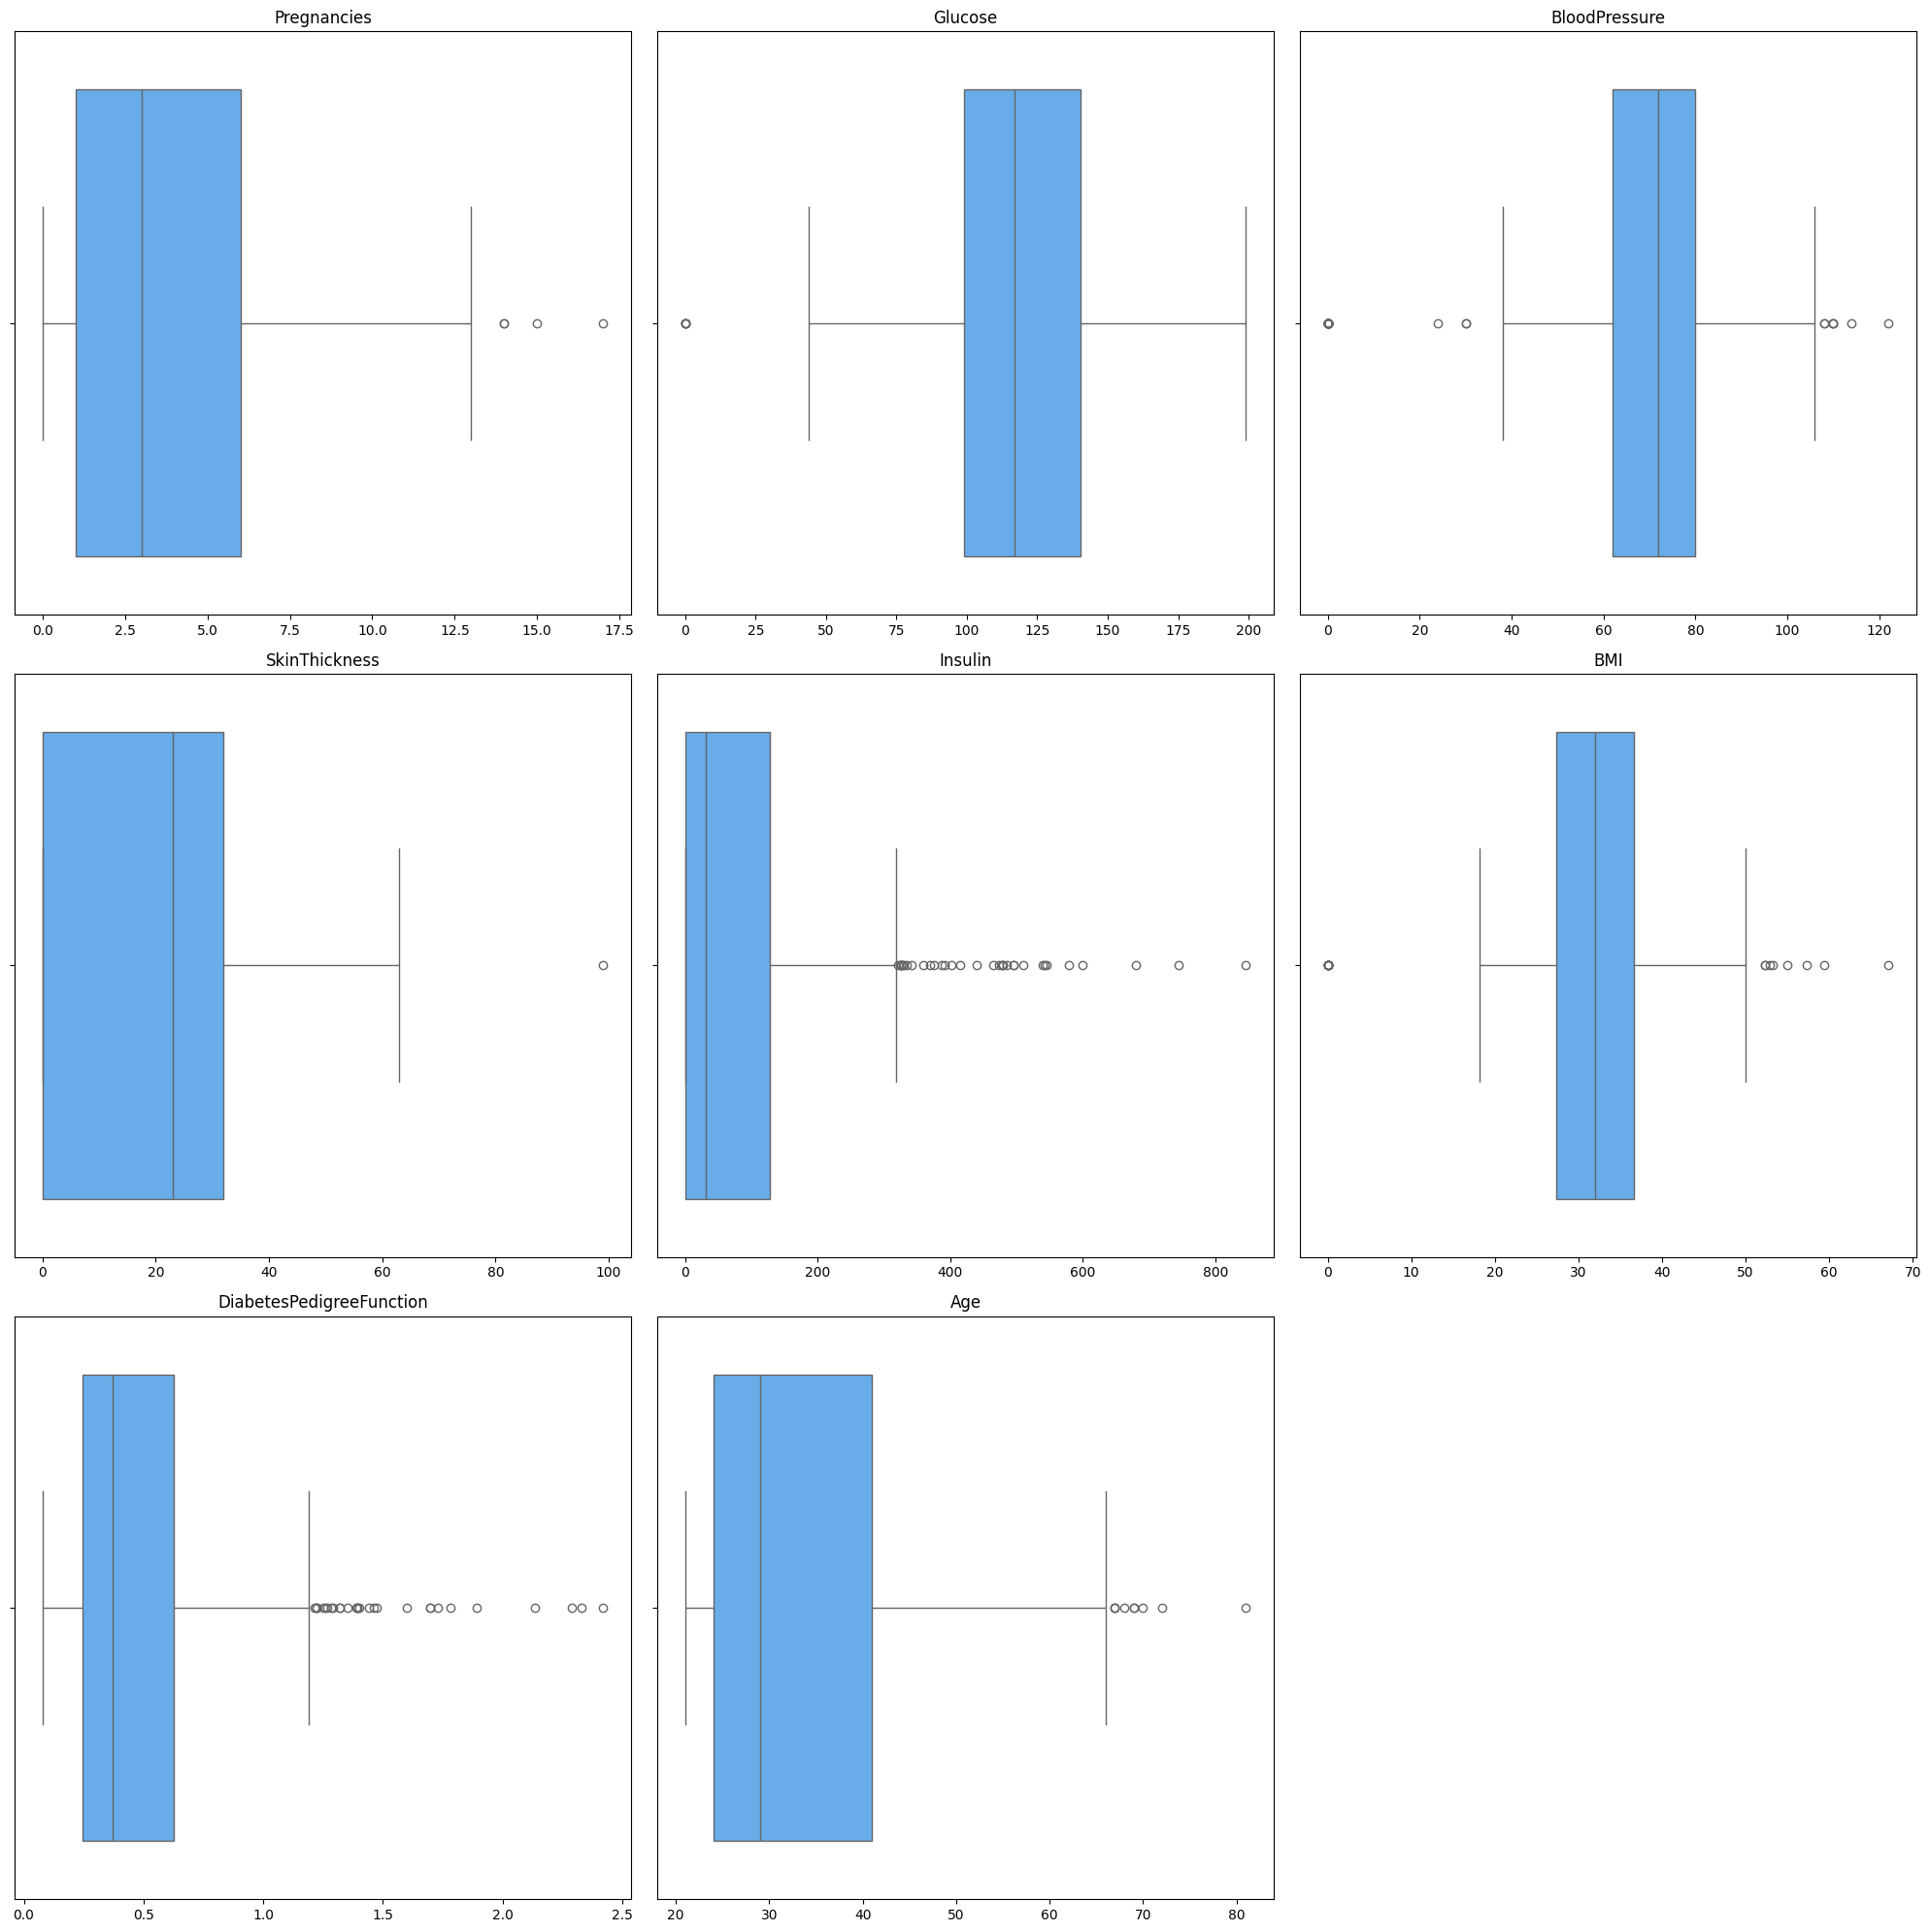

In [10]:
#Box plot
plt.figure(figsize=(20, 20))
ind=1
for  variable in (df.columns.tolist()[:-1]):
    plt.subplot(3, 3, ind)
    sns.boxplot(x=df[variable],color="#52aeff")
    plt.title(variable)
    ind+=1
    plt.xlabel('')
plt.tight_layout()
plt.show()

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

___Observation :___

- Outliers are seen in all the feature variables. Since the data is too small, removing the outliers means it will again be reduced. Let's try to train the model with outliers and check for accuracy.

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

#### ___Feature Engineering :___

___Correlation Matrix :___

In [11]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


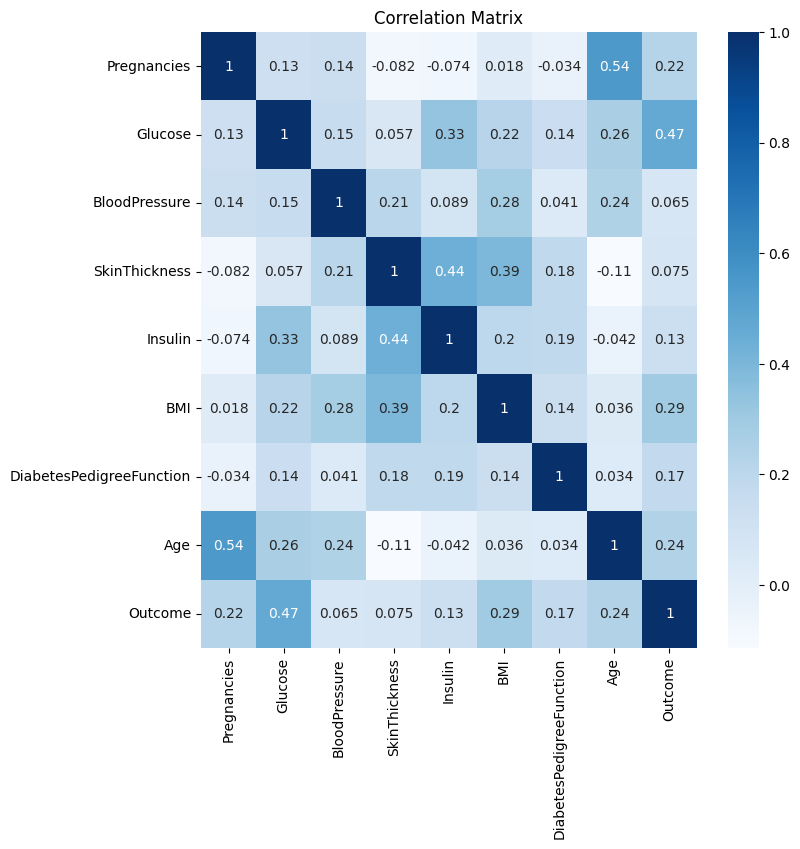

In [12]:
plt.figure(figsize=(8, 8))
sns.heatmap(df.corr(), annot=True, cmap='Blues')
plt.title('Correlation Matrix')
plt.show()

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

___Observation :___
- There is a notable positive correlation between 'SkinThickness' and 'Insulin'(44%), 'SkinThickeness' and 'BMI' (39%) as well as 'Pregnancies' and 'Age' (54%) in the dataset..
- Based on the correlation heatmap, it's evident that there's a notable correlation between the 'Outcome' variable and the features 'Glucose', 'BMI', 'Age', 'DiabetesPedigreeFunction' and 'Insulin'.

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

#### ___Data Preprocessing :___

In [13]:
#Creating a new dataframe with selected features
df_new=df[['Glucose','BMI','Age','DiabetesPedigreeFunction','Insulin','Outcome']]
df_new.sample(5)

,Glucose,BMI,Age,DiabetesPedigreeFunction,Insulin,Outcome
42,106,22.7,48,0.235,0,0
652,123,34.1,28,0.269,77,0
463,88,27.6,37,0.258,0,0
483,84,38.2,23,0.233,125,0
764,122,36.8,27,0.340,0,0


- Within the dataset, certain columns such as 'Glucose' and 'SkinThickness' etc., contains meaningless zero values. It's essential to identify and eliminate these instances to ensure data accuracy. After removal, we can proceed to impute appropriate values relative to the dataset's context.

In [14]:
#Checking for columns with "O" entries
for column in df_new.columns:
    zero_count = (df_new[column] == 0).sum()
    print(f"{column}--{zero_count} ")

Glucose--5 
BMI--11 
Age--0 
DiabetesPedigreeFunction--0 
Insulin--374 
Outcome--500 


In [15]:
cols= df_new.iloc[:, :-1]
zero_entries = df_new[(cols== 0).any(axis=1)]
zero_entries.sample(n=5)

,Glucose,BMI,Age,DiabetesPedigreeFunction,Insulin,Outcome
102,125,22.5,21,0.262,0,0
133,84,38.3,39,0.457,0,0
727,141,32.4,22,0.433,0,0
240,91,29.2,21,0.192,0,0
202,108,27.3,32,0.787,0,0


In [16]:
# Glucose  is like normally distributed, so zero is replaced with mean 
glucose_mean = df_new[df_new['Glucose'] != 0]['Glucose'].mean()
df_new.loc[df['Glucose'] == 0, 'Glucose'] = glucose_mean
#---------------------------------------------------------------------------------------------------------
# BMI  is like normally distributed, so zero is replaced with mean 
bmi_mean = df_new[df_new['BMI'] != 0]['BMI'].mean()
df_new.loc[df_new['BMI'] == 0, 'BMI'] = bmi_mean
#---------------------------------------------------------------------------------------------------------
# Insulin is like right skewed, so zero is replaced with median
median_insulin = df_new['Insulin'].median()
df_new['Insulin'] = df_new['Insulin'].replace(0, median_insulin)
#---------------------------------------------------------------------------------------------------------
#Checking for columns with "O" entries after imputing
for column in df_new.columns:
    zero_count = (df_new[column] == 0).sum()
    print(f"{column}--{zero_count} ")

Glucose--0 
BMI--0 
Age--0 
DiabetesPedigreeFunction--0 
Insulin--0 
Outcome--500 


-------------------------------------------------------------------------------------------------------------------
### ***Machine Learning***
-------------------------------------------------------------------------------------------------------------------

In [17]:
#Import necessary Libraries
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,f1_score


In [18]:
#Splitting Feature Variable(X) and Target Variable(y)
X=df_new.iloc[:,:-1]
y=df_new["Outcome"]

In [19]:
# Split the datasets for training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 

In [20]:
#Scaling the data 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

##### ___Cross validation :___

In [21]:
#Random Forest Model
rfc_model= RandomForestClassifier()
#------------------------------------------------------------------------------------------------
#5 Fold Cross validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(rfc_model, X_train_scaled, y_train, cv=kfold, scoring='accuracy')
#------------------------------------------------------------------------------------------------
print("Cross Validation Scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())
print("Standard Deviation:", cv_scores.std())

Cross Validation Scores: [0.7398374  0.75609756 0.76422764 0.76422764 0.71311475]
Mean Accuracy: 0.7475009996001599
Standard Deviation: 0.019362885535913765


+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

___Observation :___
- There is not too mach change in the accuracy when the model is trained with different folds of data but the mean accuracy is too low (0.74%).

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

#### ___Training Different Models :___

- Different classification models,such as

       - Decision Tree
       - Random Forest Classifier
       - XGBoost Classifier
       - Support Vector Classifier
       
are trained and checked for performance.

In [22]:
models = {
            "Decision Tree": DecisionTreeClassifier(),
            "Random Forest": RandomForestClassifier(),
            "XGBoost": XGBClassifier(),
            "SVC": SVC(),
         }
#------------------------------------------------------------------------------------------
results = []
#------------------------------------------------------------------------------------------
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_train_pred = model.predict(X_train_scaled)
    y_test_pred = model.predict(X_test_scaled)
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)
    f1 = f1_score(y_test, y_test_pred, average='weighted')
    results.append({'Model': name, 'Train Accuracy': train_acc, 'Test Accuracy': test_acc, 'F1 Score': f1})

#------------------------------------------------------------------------------------------
results_df = pd.DataFrame(results)
#------------------------------------------------------------------------------------------
results_df

,Model,Train Accuracy,Test Accuracy,F1 Score
0,Decision Tree,1.00000,0.746753,0.745981
1,Random Forest,1.00000,0.792208,0.787957
2,XGBoost,1.00000,0.772727,0.777668
3,SVC,0.80456,0.805195,0.799644


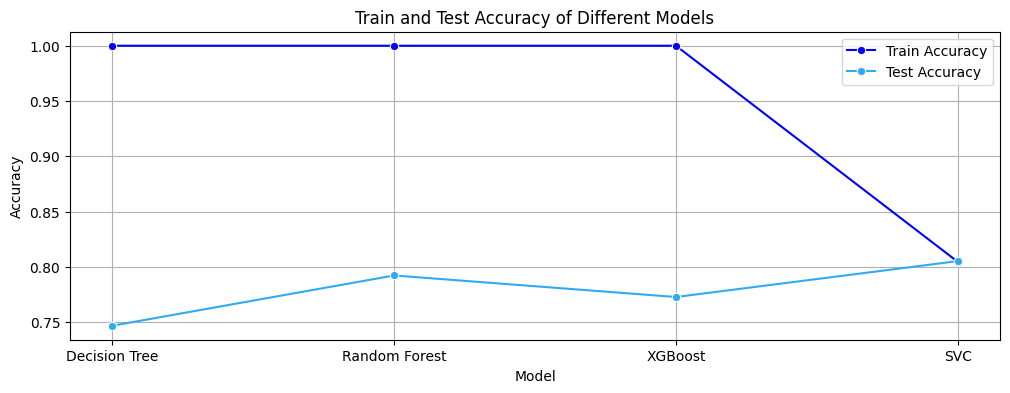

In [35]:
# Line Graph 
plt.figure(figsize=(12, 4))
sns.lineplot(data=results_df, x="Model", y='Train Accuracy', marker='o', color='blue', label='Train Accuracy')
sns.lineplot(data=results_df, x="Model", y='Test Accuracy', marker='o', color='#32aaf0', label='Test Accuracy')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Train and Test Accuracy of Different Models')
plt.legend()
plt.grid(True)
plt.show()

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

___Observation :___

-  Decision Tree, Random Forest, XGBoost appears to have overfit the training data as it has the highest train accuracy but lower test accuracy.Their F1-Score also low.

- Even though the accuracy is low,SVC performs decently well, and its train and test accuracy are almost similar (80%). It's F1-Score is also low,it is because of class imbalance and not having enough data for training.

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

#### ***Support Vector Classifier(SVC) with Hyperparameter Tuning :***
- Using for RandomizedSearchCV hyperparameter tuning

In [24]:
# Parameter grid for grid search
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf','poly'],
}
#----------------------------------------------------------------------------
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#----------------------------------------------------------------------------
# Grid search with cross-validation
grid_search = GridSearchCV(estimator=SVC(), param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
#----------------------------------------------------------------------------
# Best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)
#----------------------------------------------------------------------------
# Best estimator
best_estimator = grid_search.best_estimator_
#----------------------------------------------------------------------------
# Prediction
y_pred = best_estimator.predict(X_test)
#----------------------------------------------------------------------------
# Classification report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

Best Parameters: {'C': 1, 'kernel': 'linear'}
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.84      0.82        99
           1       0.69      0.64      0.66        55

    accuracy                           0.77       154
   macro avg       0.75      0.74      0.74       154
weighted avg       0.76      0.77      0.76       154



- __Best parameters Of SVC model :__
 
        *  C      =     1    
        *  kernel = "linear" 

In [25]:
#Saving the trained Model
import pickle
#-----------------------------------------------------------
with open('svm_model.pkl', 'wb') as file:
    pickle.dump(best_estimator, file)
#-----------------------------------------------------------
print("Model saved successfully as", 'svm_model.pkl')

Model saved successfully as svm_model.pkl


___Confusion Matrix :___

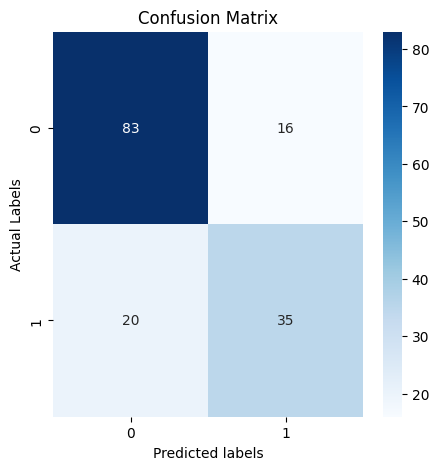

In [40]:
cm = confusion_matrix(y_test, y_pred)
#-----------------------------------------------------------
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix')
plt.show()

___Actual Output vs Predicted Output :___

In [41]:
outcome_mapping = {1: 'Diabetic', 0: 'Not Diabetic'}
y_test_mapped = [outcome_mapping[val] for val in y_test]
y_pred_mapped = [outcome_mapping[val] for val in y_pred]
#----------------------------------------------------------------------------------------------
result_df= pd.DataFrame({'Actual Outcome': y_test_mapped, 'Predicted Outcome': y_pred_mapped})
result_df.sample(n=7)

,Actual Outcome,Predicted Outcome
87,Diabetic,Not Diabetic
145,Not Diabetic,Not Diabetic
80,Diabetic,Diabetic
14,Not Diabetic,Not Diabetic
93,Diabetic,Not Diabetic
94,Not Diabetic,Not Diabetic
113,Diabetic,Diabetic


+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

___Observation :___

- The model finds it hard to predict instances that are actually negative (not diabetic) but get classified as positive (diabetic) and instances that are actually positive (diabetic) but get classified as negative (not diabetic). This difficulty is because there are fewer examples of one class compared to the other in the dataset (class imbalance). 

___Suggestion :___

- In future the model is trained with enough data with balanced class to overcome less accuracy and F1-Score issues.

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++